<a href="https://colab.research.google.com/github/trishabhogawar/BigMart_Sales/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
train = pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l..csv')
ss=pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
test.isna().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [11]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [13]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})

In [14]:
train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [15]:
test['Item_Visibility'].unique()

array([0.00756484, 0.03842768, 0.09957491, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [16]:
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)

In [17]:
train['running'] = 2013 - train['Outlet_Establishment_Year']
test['running'] = 2013 - test['Outlet_Establishment_Year']

In [18]:
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']

In [19]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [21]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

<Axes: xlabel='Item_MRP', ylabel='Density'>

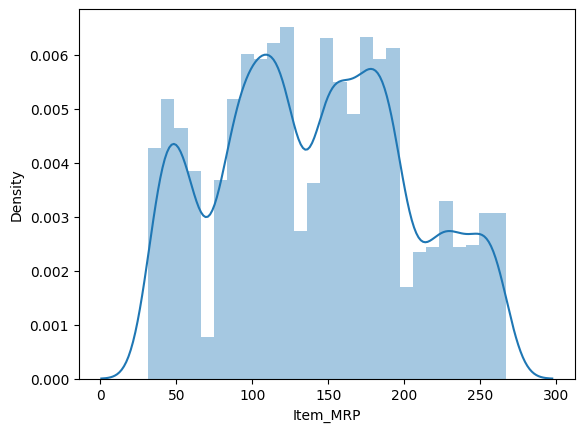

In [22]:
sns.distplot(train['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

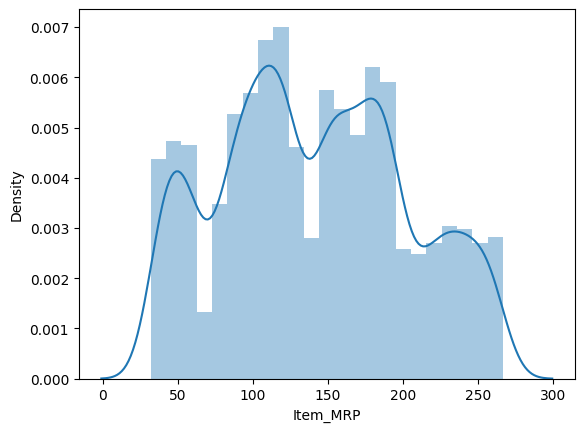

In [23]:
sns.distplot(test['Item_MRP'])

<Axes: xlabel='Item_Weight', ylabel='Density'>

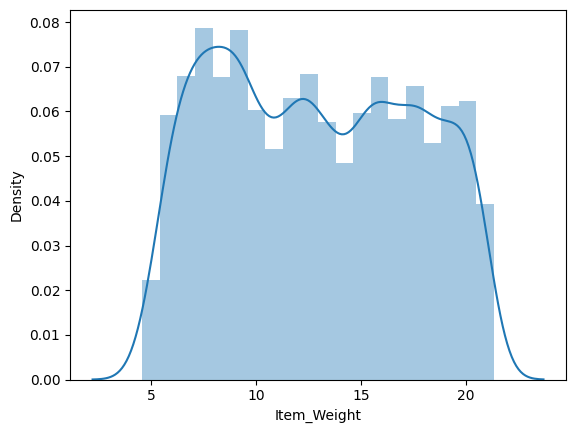

In [24]:
sns.distplot(train['Item_Weight'])


In [25]:

bins = [0, 5, 10, 20, float('inf')]
labels = ['<5', '5-10', '10-20', '>20']

train['Weight_Category'] = pd.cut(train['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')
test['Weight_Category'] = pd.cut(test['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')




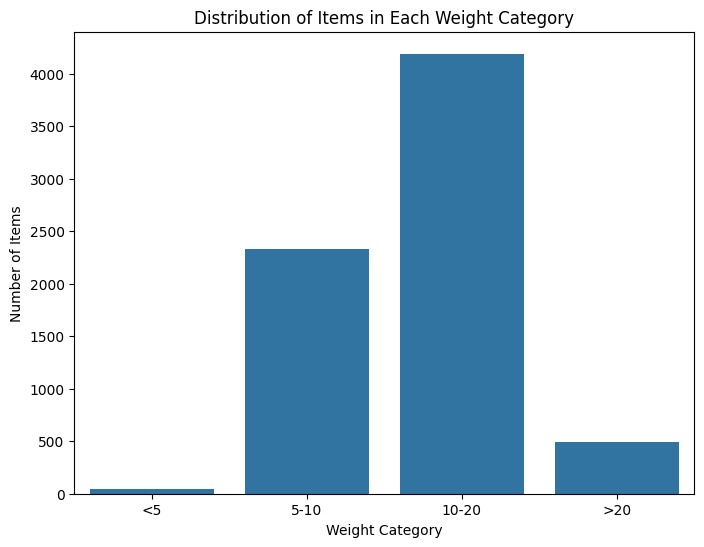

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

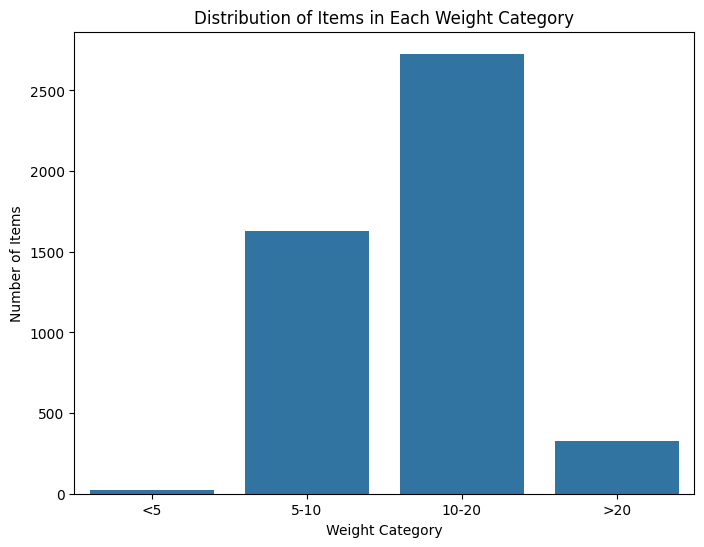

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

In [28]:
train.Weight_Category.fillna("10-20",inplace=True)
test.Weight_Category.fillna("10-20",inplace=True)

<Axes: xlabel='Item_Visibility', ylabel='Density'>

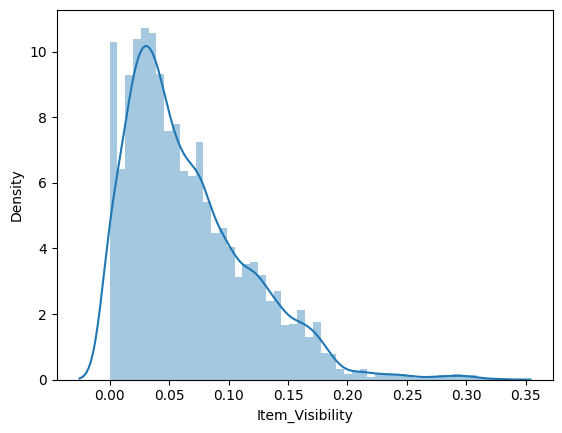

In [29]:
sns.distplot(train['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

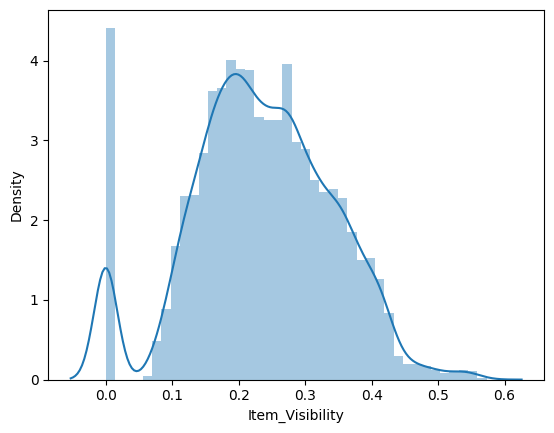

In [30]:
sns.distplot(np.sqrt(train['Item_Visibility']))

In [31]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

In [32]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, train['Item_Visibility'].median())
test['Item_Visibility'] = test['Item_Visibility'].replace(0, test['Item_Visibility'].median())

<Axes: xlabel='Item_Visibility', ylabel='Density'>

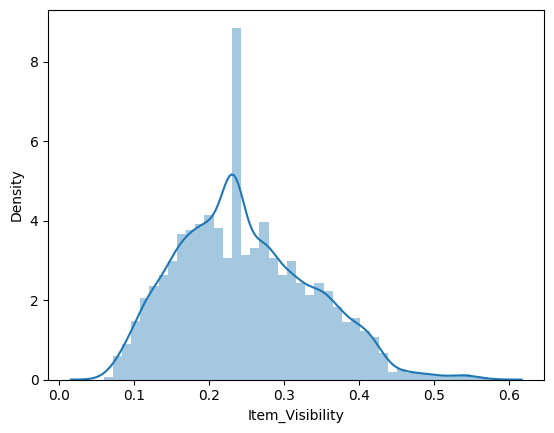

In [33]:
sns.distplot(train['Item_Visibility'])

In [34]:
train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

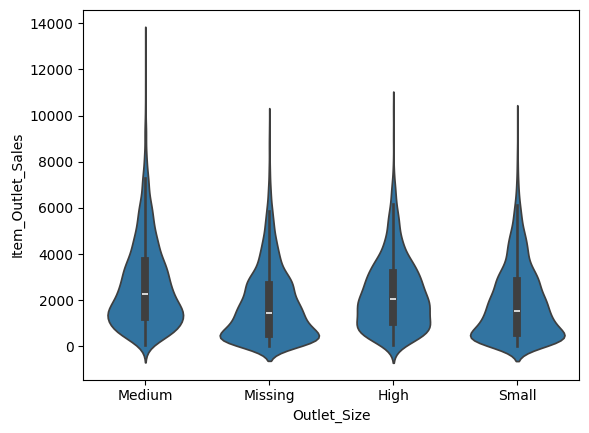

In [35]:
sns.violinplot(x=train.Outlet_Size.fillna("Missing"),y='Item_Outlet_Sales',data=train)

In [36]:
train.Outlet_Size.fillna("Small",inplace=True)

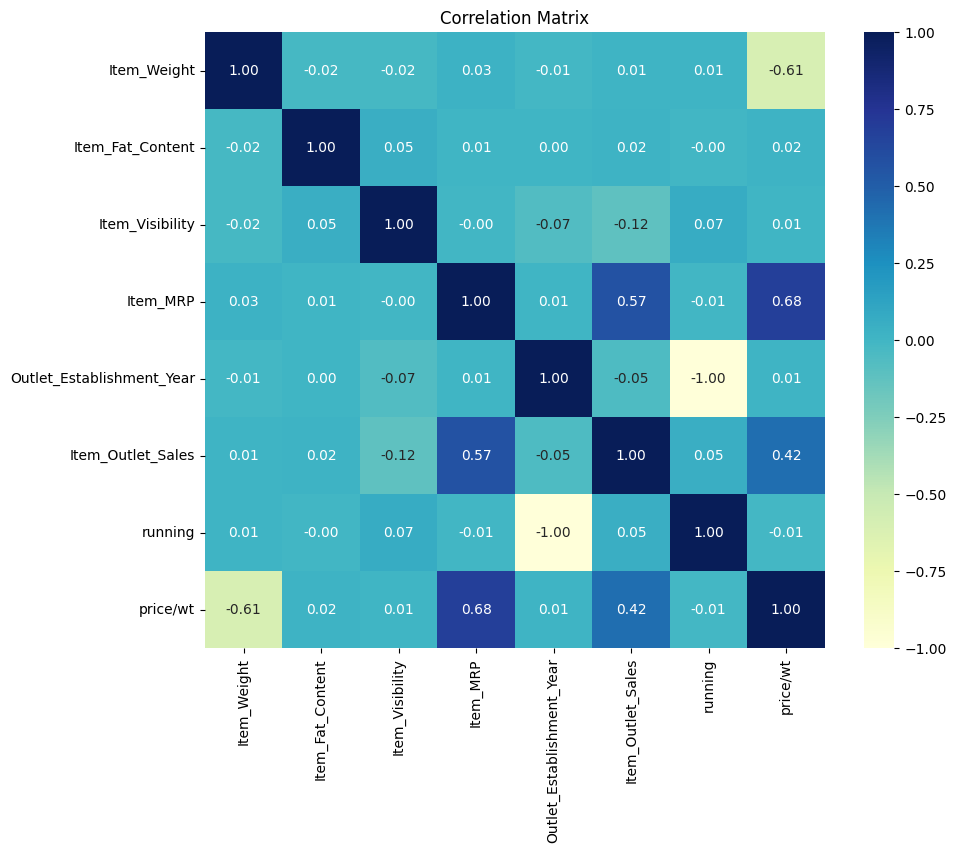

In [37]:
numeric_features = train.select_dtypes(include=np.number).columns
correlation_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [38]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight','price/wt'],axis=1)

In [39]:
x_train.isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
running,0


In [40]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

def objective(trial,data=x_train,target=y_train):

    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param,cat_features=categorical_features)

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)

    return rmse

In [41]:
Best_trial = {'l2_leaf_reg': 0.001061926310,'max_bin': 322,
 'learning_rate': 0.01081467174,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 163,
              'loss_function': 'RMSE','n_estimators':  1000}

In [42]:
for col in x_train.columns[categorical_features]:
    x_train[col] = x_train[col].astype(str)
    test[col] = test[col].astype(str)

In [43]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]
model = CatBoostRegressor(**Best_trial,cat_features=categorical_features)
model.fit(x_train, y_train)
test_pred = model.predict(test[x_train.columns])

0:	learn: 1695.8977130	total: 73.8ms	remaining: 1m 13s
1:	learn: 1685.9411644	total: 91.7ms	remaining: 45.7s
2:	learn: 1676.2912010	total: 108ms	remaining: 35.9s
3:	learn: 1666.5562994	total: 131ms	remaining: 32.5s
4:	learn: 1656.9936078	total: 154ms	remaining: 30.7s
5:	learn: 1647.1507760	total: 190ms	remaining: 31.4s
6:	learn: 1638.1085315	total: 211ms	remaining: 29.9s
7:	learn: 1628.6364274	total: 238ms	remaining: 29.5s
8:	learn: 1619.7260781	total: 255ms	remaining: 28.1s
9:	learn: 1610.4629397	total: 284ms	remaining: 28.1s
10:	learn: 1601.4654032	total: 312ms	remaining: 28.1s
11:	learn: 1592.7626515	total: 331ms	remaining: 27.3s
12:	learn: 1583.8754139	total: 360ms	remaining: 27.3s
13:	learn: 1576.3010013	total: 381ms	remaining: 26.8s
14:	learn: 1568.1867767	total: 396ms	remaining: 26s
15:	learn: 1559.9187484	total: 419ms	remaining: 25.8s
16:	learn: 1551.7492154	total: 443ms	remaining: 25.6s
17:	learn: 1544.0212257	total: 461ms	remaining: 25.1s
18:	learn: 1535.9967155	total: 478ms	

In [45]:
test_pred[test_pred<33]=33
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('test_catboost.csv',index=False)

In [46]:
import os
os.getcwd()

'/content'